<a href="https://colab.research.google.com/github/adeliacarol/intro_cd/blob/master/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## **Carga e apresentação inicial dos dados**

In [0]:
# dados de emendas parlamentares obtidos em http://www.portaltransparencia.gov.br/download-de-dados/emendas-parlamentares

#dados originais
ds = pd.read_csv('https://raw.githubusercontent.com/adeliacarol/intro_cd/master/Emendas.csv',encoding = "ISO-8859-1", decimal=',')


In [3]:
#visualizacao de amostra
ds.head()

,Código da Emenda,Ano da Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Código IBGE Município,Nome Município,Código IBGE Estado,Nome Estado,Código Região,Nome Região,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
0,201534200006,2015,3420,ABELARDO LUPION,6,4106902,CURITIBA,4100000,PARANÁ,S,Sul,10,Saúde,301,Atenção básica,789725.0,0.0,0.0,0.00,0.0,789725.00
1,201534200007,2015,3420,ABELARDO LUPION,7,4107751,FIGUEIRA,4100000,PARANÁ,S,Sul,15,Urbanismo,451,infra-estrutura urbana,1400000.0,0.0,0.0,1380356.14,0.0,211277.92
2,201534200010,2015,3420,ABELARDO LUPION,10,4109708,IBAITI,4100000,PARANÁ,S,Sul,15,Urbanismo,451,infra-estrutura urbana,1400000.0,0.0,0.0,539309.68,0.0,1262493.32
3,201534200013,2015,3420,ABELARDO LUPION,13,4111803,JACAREZINHO,4100000,PARANÁ,S,Sul,10,Saúde,301,Atenção básica,500000.0,0.0,0.0,45400.00,0.0,454600.00
4,201534200014,2015,3420,ABELARDO LUPION,14,4111803,JACAREZINHO,4100000,PARANÁ,S,Sul,10,Saúde,122,Administração geral,231800.0,0.0,0.0,0.00,0.0,231800.00


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28967 entries, 0 to 28966
Data columns (total 21 columns):
Código da Emenda                   28967 non-null int64
Ano da Emenda                      28967 non-null int64
Código do Autor da Emenda          28967 non-null int64
Nome do Autor da Emenda            28967 non-null object
Número da emenda                   28967 non-null int64
Código IBGE Município              28967 non-null int64
Nome Município                     28967 non-null object
Código IBGE Estado                 28967 non-null int64
Nome Estado                        28967 non-null object
Código Região                      27854 non-null object
Nome Região                        28967 non-null object
Código Função                      28967 non-null int64
Nome Função                        28967 non-null object
Código Subfunção                   28967 non-null int64
Nome Subfunção                     28967 non-null object
Valor Empenhado                    28967 non

In [5]:
ds.dtypes

Código da Emenda                     int64
Ano da Emenda                        int64
Código do Autor da Emenda            int64
Nome do Autor da Emenda             object
Número da emenda                     int64
Código IBGE Município                int64
Nome Município                      object
Código IBGE Estado                   int64
Nome Estado                         object
Código Região                       object
Nome Região                         object
Código Função                        int64
Nome Função                         object
Código Subfunção                     int64
Nome Subfunção                      object
Valor Empenhado                    float64
Valor Liquidado                    float64
Valor Pago                         float64
Valor Restos A Pagar Inscritos     float64
Valor Restos A Pagar Cancelados    float64
Valor Restos A Pagar Pagos         float64
dtype: object

### **Pré-processamento**

Sobre as colunas apresentadas:

* Código da Emenda é uma concatenação de Ano, Código do Autor e Número da emenda
* Código do Autor ou Nome do Autor tem a mesma função de identificar o parlamentar
* Código IBGE Município ou Nome Município tem a mesma função de identificar o município
* Código IBGE Estado ou Nome Estado tem a mesma função de identificar o estado
* Código Região ou Nome Região tem a mesma função de identificar a região
* Código Função ou Nome Função tem a mesma função de identificar a função
* Código Subfunção ou Nome Subfunção tem a mesma função de identificar a subfunção

Portanto, para efeito de simplificação, serão excluídas as colunas Código da Emenda, Código do Autor, Código IBGE Município, Código IBGE Estado, Código Região, Código Função e Código Subfunção. 

Dentre as colunas restantes, aquelas tipadas como object, serão alteradas para o tipo categoria: Nome Autor, Nome Município, Nome Estado, Nome Região, Nome Função, Nome Subfunção.

Obs.: para efeito de praticar a conversão para categorias, optou-se por remover as colunas contendo códigos originais e categorizar as colunas 'Nome'.

In [6]:
#redefinindo os tipos object para categoria

colunas_categorias = ds.select_dtypes(['object']).columns
ds[colunas_categorias] = ds[colunas_categorias].astype('category')

print('\n### colunas alteradas para categoria ###')
print(colunas_categorias.values)

# ds['Autor cat'] = ds['Nome do Autor da Emenda'].cat.codes;
# ds['Município cat'] = ds['Nome Município'].cat.codes;
# ds['Estado cat'] = ds['Nome Estado'].cat.codes;
# ds['Região cat'] = ds['Nome Região'].cat.codes;
# ds['Função cat'] = ds['Nome Função'].cat.codes;
# ds['Subfunção cat'] = ds['Nome Subfunção'].cat.codes;


### colunas alteradas para categoria ###
['Nome do Autor da Emenda' 'Nome Município' 'Nome Estado' 'Código Região'
 'Nome Região' 'Nome Função' 'Nome Subfunção']


In [7]:
#removendo colunas desnecessarias
print('### colunas originais enumeradas ###')
print(list(enumerate(ds.columns.values)))

colunas_a_remover = ds.columns[[0, 2, 5, 7, 9, 11, 13]].values

print('\n### colunas removidas ###')
print(colunas_a_remover)

ds.drop(colunas_a_remover, axis=1, inplace=True)


### colunas originais enumeradas ###
[(0, 'Código da Emenda'), (1, 'Ano da Emenda'), (2, 'Código do Autor da Emenda'), (3, 'Nome do Autor da Emenda'), (4, 'Número da emenda'), (5, 'Código IBGE Município'), (6, 'Nome Município'), (7, 'Código IBGE Estado'), (8, 'Nome Estado'), (9, 'Código Região'), (10, 'Nome Região'), (11, 'Código Função'), (12, 'Nome Função'), (13, 'Código Subfunção'), (14, 'Nome Subfunção'), (15, 'Valor Empenhado'), (16, 'Valor Liquidado'), (17, 'Valor Pago'), (18, 'Valor Restos A Pagar Inscritos'), (19, 'Valor Restos A Pagar Cancelados'), (20, 'Valor Restos A Pagar Pagos')]

### colunas removidas ###
['Código da Emenda' 'Código do Autor da Emenda' 'Código IBGE Município'
 'Código IBGE Estado' 'Código Região' 'Código Função' 'Código Subfunção']


Após retirada de colunas consideradas redundantes e redefinição de tipos *object* em *category*, segue o dataset resultante:


In [8]:
ds.dtypes

Ano da Emenda                         int64
Nome do Autor da Emenda            category
Número da emenda                      int64
Nome Município                     category
Nome Estado                        category
Nome Região                        category
Nome Função                        category
Nome Subfunção                     category
Valor Empenhado                     float64
Valor Liquidado                     float64
Valor Pago                          float64
Valor Restos A Pagar Inscritos      float64
Valor Restos A Pagar Cancelados     float64
Valor Restos A Pagar Pagos          float64
dtype: object

Sobre os dados, é interessante conhecer a quantidade de registros sem informação e em duplicidade para que se aplica alguma estratégia, seja de remoção, seja de imputação de dados.

In [9]:
#verificação de quantos registros com valores em duplicidade há no dataset
print("## Em duplicidade: " , ds.duplicated().sum())

#verificação de quantos registros com valores nulos há no dataset, por coluna
print("\n## Nulos: \n\n" , ds.isna().sum())


## Em duplicidade:  0

## Nulos: 

 Ano da Emenda                      0
Nome do Autor da Emenda            0
Número da emenda                   0
Nome Município                     0
Nome Estado                        0
Nome Região                        0
Nome Função                        0
Nome Subfunção                     0
Valor Empenhado                    0
Valor Liquidado                    0
Valor Pago                         0
Valor Restos A Pagar Inscritos     0
Valor Restos A Pagar Cancelados    0
Valor Restos A Pagar Pagos         0
dtype: int64


Como a característica desta base de dados é demonstrar valores empenhados originados de emendas parlamentares distribuídos por variáveis **predominantemente qualitativas** (tais como Região,Estado e Função), optou-se por analisar gráficos de barras de frequência absoluta e de total de valores distribuidos nas diferentes variáveis.

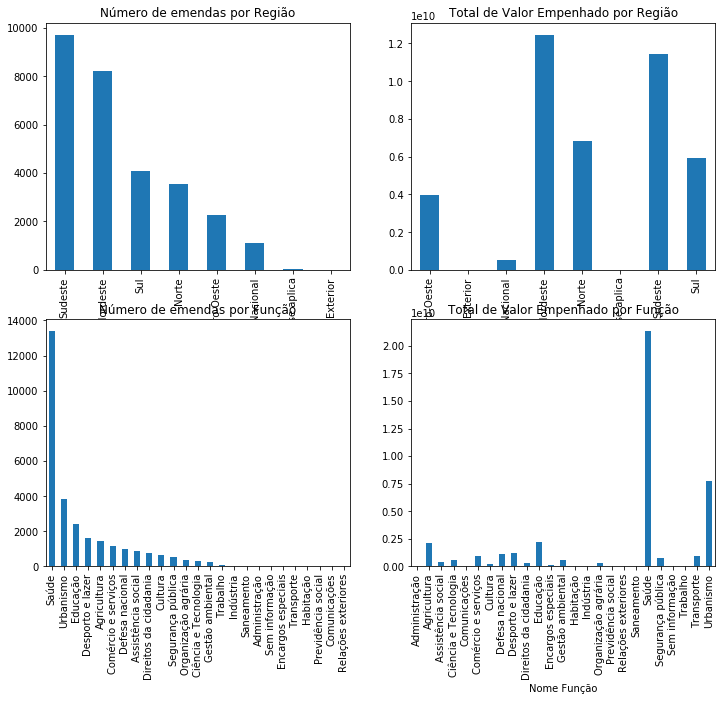

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ds['Nome Região'].value_counts().plot(kind='bar', ax=axs[0,0], title='Número de emendas por Região')
ds.groupby(['Nome Região'])['Valor Empenhado'].sum().plot(kind='bar', ax=axs[0,1], title='Total de Valor Empenhado por Região')

ds['Nome Função'].value_counts().plot(kind='bar', ax=axs[1,0], title='Número de emendas por Função')
ds.groupby(['Nome Função'])['Valor Empenhado'].sum().plot(kind='bar', ax=axs[1,1], title='Total de Valor Empenhado por Função')

plt.show()


Analisamos pelos gráficos de barra acima, a distribuição da frequência de registros de emendas. 
* Na primeira linha, a quantidade de emendas destinadas às regiões do país, com predominância das regiões Sudeste e Nordeste sobre as demais regiões, chegando a ter mais que o dobro do número de emendas destinadas.
* Ainda na primeira linha, o valor total empenhado em cada região do país. A tendência observada de que mais recursos são destinados ao Nordeste e Sudeste se confirma, não somente por quantidade de emendas, mas por valores destinados.
* Análise similiar é realizada nas duas imagens seguintes, com a particularidade da variável observada ser a Função, não mais a Região. Logo, podemos perceber pela distribuição gráfica que a frequência maior de emendas parlamentares se refere à área de Saúde e que, também, esta é a 'função' para a qual são destinados mais recursos, seguidos por Urbanismo e Educação, mas em proporções muito superiores.

Na plotagem dos dados das variáveis observadas, percebemos algumas categorias que podem ser desconsideradas para este estudo e , para fim de aprendizado, foram também removidas do *dataset* conforme segue.

In [11]:
#Alguns registros cuja Região na base de dados estão setados como 'Não se aplica', 'Nacional' e 'Exterior' 
nan = ds[(ds['Nome Região'] == 'Não se aplica') | (ds['Nome Região'] == 'Exterior') | (ds['Nome Região'] == 'Nacional')]
print(nan.shape)
print(ds.shape)

#retirada dos registros cuja Região tem os valores 'Não se aplica', 'Nacional' e 'Exterior' 
ds = ds[(ds['Nome Região'] != 'Não se aplica') & (ds['Nome Região'] != 'Exterior') & (ds['Nome Região'] != 'Nacional')]
print(ds.shape)

(1145, 14)
(28967, 14)
(27822, 14)


Gráficos do tipo boxplot são interessantes quando da análise de variáveis qualitativas em conjunto com quantitativas. Com o intuito de observar a distribuição dos valores empenhados por região e por função, utilizamos este gráfico. A partir dele é possível visualizar a mediana, os quartis, a dispersão e a presença de outliers, os registros que se afastam muito da distribuição. 

As imagens a seguir mostram que o número de registros que desviam da média é muito alto, e que os desvios são de ordem de grandeza muito também altas. 

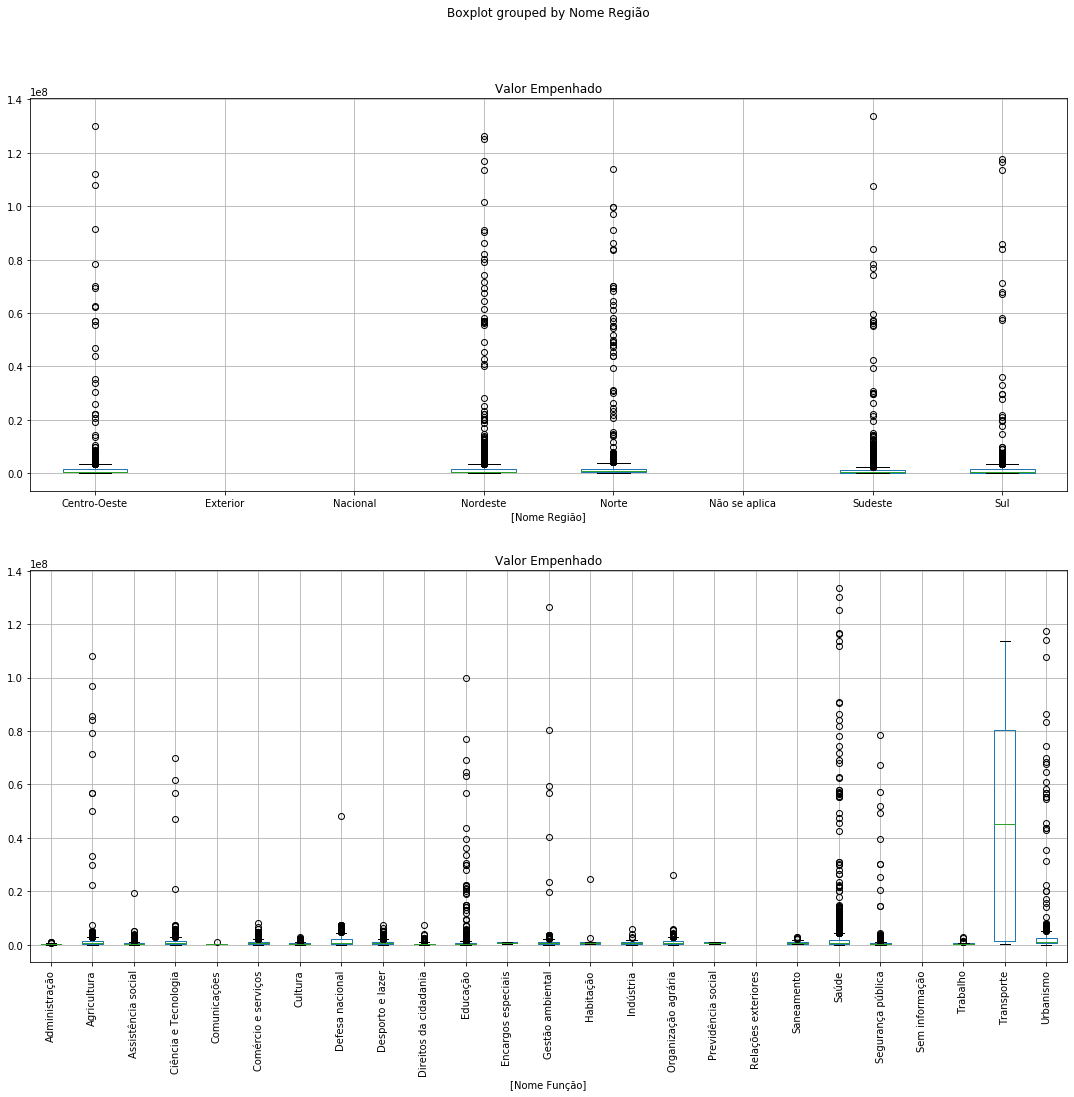

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18,16))
ds.boxplot(column=['Valor Empenhado'], by=['Nome Função'], ax=axs[1], rot=90)
ds.boxplot(column=['Valor Empenhado'], by=['Nome Região'], ax=axs[0], rot=0)


Visto que as ordens de grandezas de algumas regiões e funções específicas, diverge bastante de outras no que se refere à ordem de grandeza, achamos interessante plotar cada categoria em um gráfico à parte, como segue. 

['Administração', 'Agricultura', 'Assistência social', 'Ciência e Tecnologia', 'Comunicações', 'Comércio e serviços', 'Cultura', 'Defesa nacional', 'Desporto e lazer', 'Direitos da cidadania', 'Educação', 'Encargos especiais', 'Gestão ambiental', 'Habitação', 'Indústria', 'Organização agrária', 'Previdência social', 'Relações exteriores', 'Saneamento', 'Saúde', 'Segurança pública', 'Trabalho', 'Transporte', 'Urbanismo']
count    3.600000e+01
mean     2.964105e+05
std      2.707649e+05
min      0.000000e+00
25%      1.390338e+05
50%      2.000000e+05
75%      3.000000e+05
max      1.112133e+06
Name: Valor Empenhado, dtype: float64
count    1.428000e+03
mean     1.458781e+06
std      6.344759e+06
min      0.000000e+00
25%      3.058500e+05
50%      6.000000e+05
75%      1.252397e+06
max      1.079876e+08
Name: Valor Empenhado, dtype: float64
count    8.550000e+02
mean     4.697294e+05
std      8.242147e+05
min      0.000000e+00
25%      2.000000e+05
50%      3.000000e+05
75%      5.00000

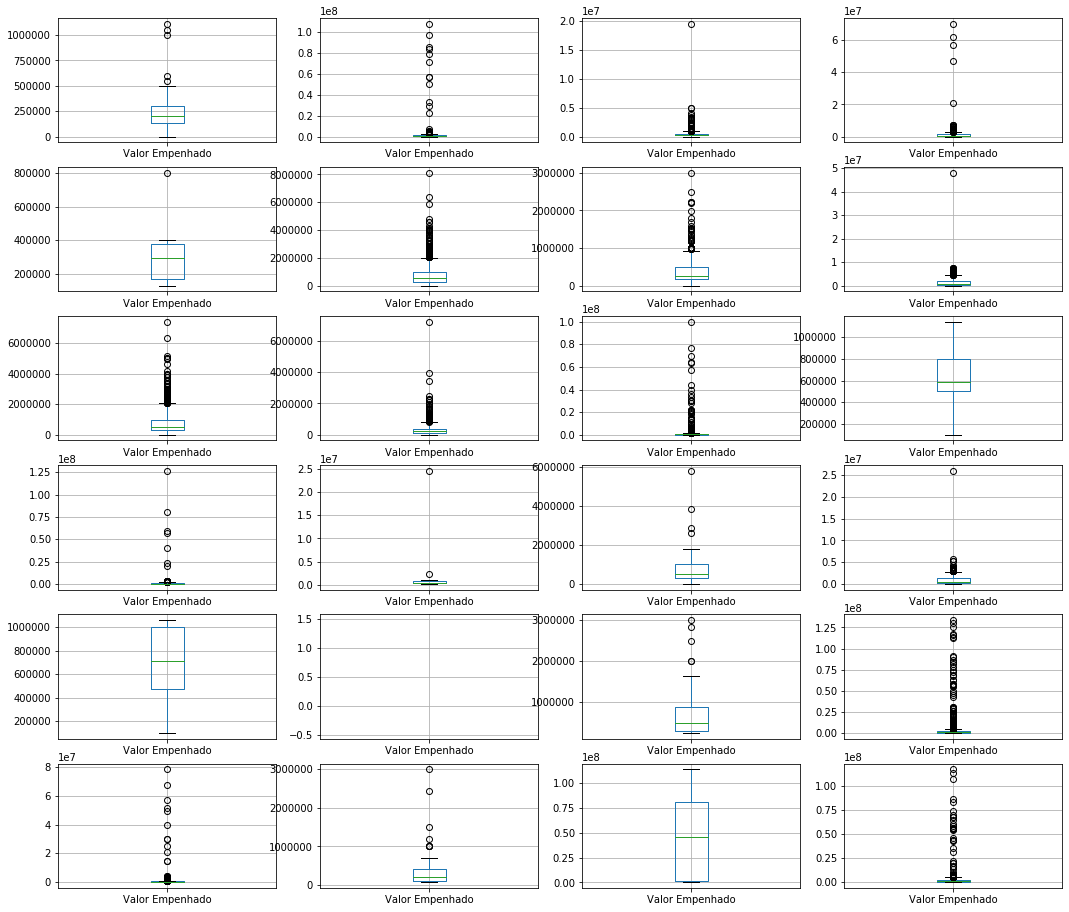

In [16]:
funs = ['Administração', 'Agricultura', 'Assistência social',
       'Ciência e Tecnologia', 'Comunicações', 'Comércio e serviços',
       'Cultura', 'Defesa nacional', 'Desporto e lazer',
       'Direitos da cidadania', 'Educação', 'Encargos especiais',
       'Gestão ambiental', 'Habitação', 'Indústria', 'Organização agrária',
       'Previdência social', 'Relações exteriores', 'Saneamento', 'Saúde',
       'Segurança pública', 'Trabalho', 'Transporte',
       'Urbanismo']

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(18,16))

# print(ds[ds['Nome Função'] == reg])

print(funs)
for i, reg in list(enumerate(funs)):
  print(ds[ds['Nome Função'] == reg]['Valor Empenhado'].describe())  

for i, reg in list(enumerate(funs)):
  # print(i//4, i%4)
  ax = ds[ds['Nome Função'] == reg].boxplot(column=['Valor Empenhado'],ax=axs[i//4, i%4])
  
  
  

['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
       Ano da Emenda  ...  Valor Restos A Pagar Pagos
count    2273.000000  ...                2.273000e+03
mean     2017.233612  ...                5.283375e+05
std         1.330664  ...                3.559705e+06
min      2015.000000  ...                0.000000e+00
25%      2016.000000  ...                0.000000e+00
50%      2017.000000  ...                6.900000e+03
75%      2018.000000  ...                4.387500e+05
max      2019.000000  ...                1.119436e+08

[8 rows x 8 columns]
       Ano da Emenda  ...  Valor Restos A Pagar Pagos
count    8208.000000  ...                8.208000e+03
mean     2017.149001  ...                4.191092e+05
std         1.330156  ...                2.008235e+06
min      2015.000000  ...                0.000000e+00
25%      2016.000000  ...                0.000000e+00
50%      2017.000000  ...                2.239285e+04
75%      2018.000000  ...                4.106262e+05
max 

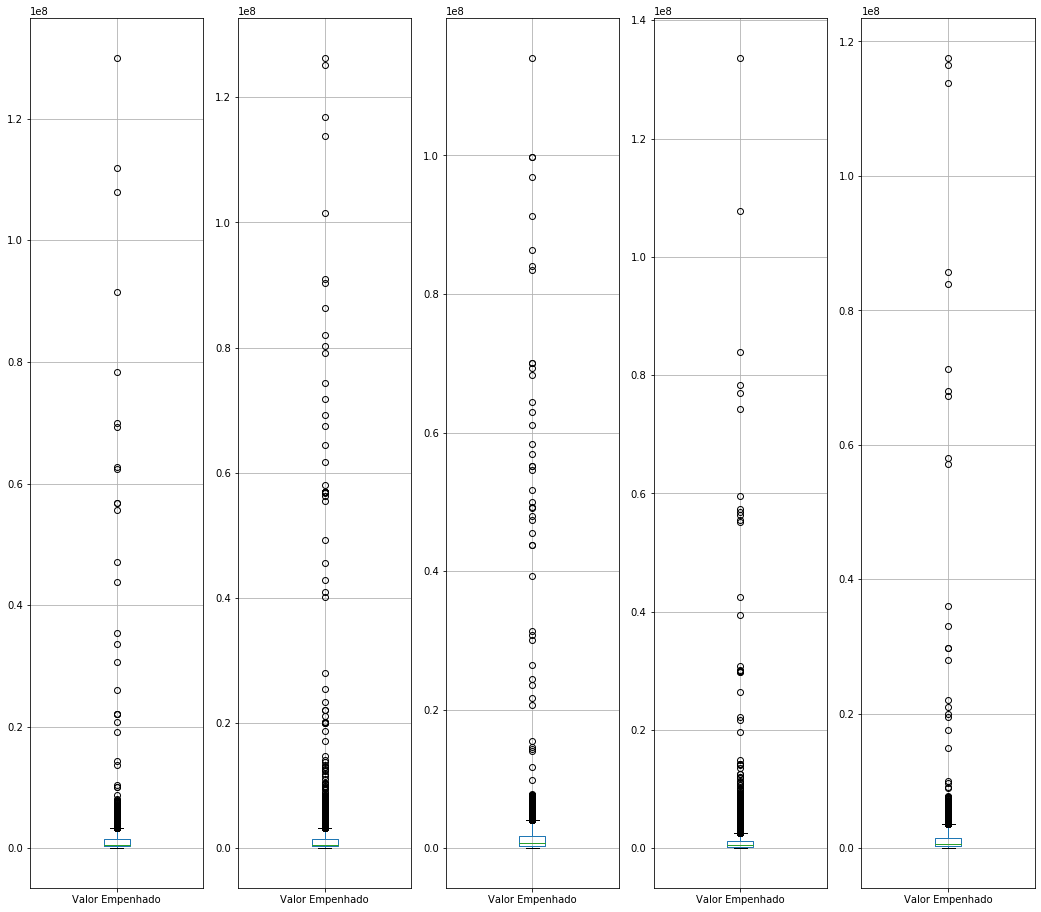

In [14]:
regioes = ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18,16))

print(regioes)
for i, reg in list(enumerate(regioes)):
  print(ds[ds['Nome Região'] == reg].describe())  

for i, reg in list(enumerate(regioes)):
  ax = ds[ds['Nome Região'] == reg].boxplot(column=['Valor Empenhado'],ax=axs[i])  

Pudemos notar que o desvio padrão da média é muito alto, na maioria dos casos observados. O que significa dizer que há uma grande quantidade de emendas que possuem valor mais baixo, o que traz a média e quartis para o canto inferior dos gráficos. Os registros que dispersam como possíveis outliers, desviam em ordem de grandeza muito alta. Por estas variáveis observadas, Função e Região, pareceu que os desvios são muito característicos e se repetem em todas as categorias, apenas olhando para elas não identificamos outliers como sendo lixo, mas aparentemente um comportamento comum para este problema. Há emendas de valores baixos em sua grande maioria, mas é comum em todas as regiões e para todas as funções para onde a verba é destinada que haja emendas com montantes muito acima da média.

Nesta base de dados, sentimos falta de variáveis quantitativas que permitissem correlacionar características das emendas e, assim, inferir hipóteses acerca da distribuição. 